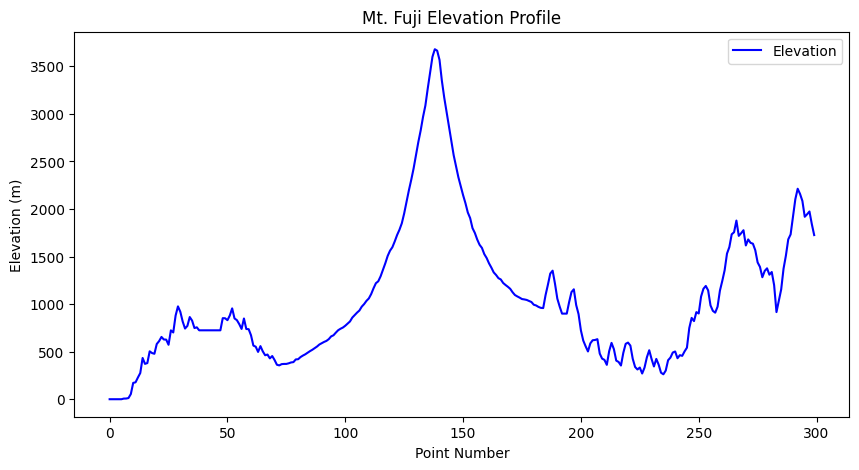

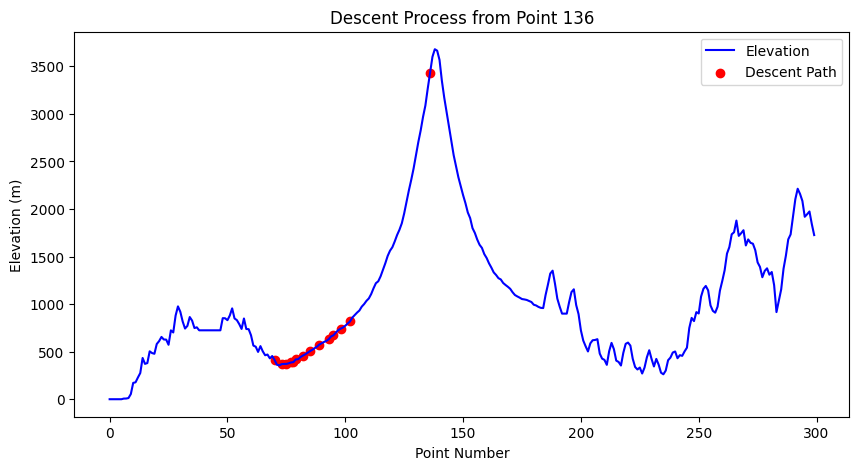

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load elevation data
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract data
point_numbers = fuji[:, 0].astype(int)
elevations = fuji[:, 3]

def plot_elevation():
    """Visualize the elevation data of Mt. Fuji."""
    plt.figure(figsize=(10, 5))
    plt.plot(point_numbers, elevations, label="Elevation", color='b')
    plt.xlabel("Point Number")
    plt.ylabel("Elevation (m)")
    plt.title("Mt. Fuji Elevation Profile")
    plt.legend()
    plt.show()

def compute_gradient(point):
    """Calculate the gradient at a specific point."""
    if point == 0:
        return 0  # No previous point available
    return (elevations[point] - elevations[point - 1]) / (point_numbers[point] - point_numbers[point - 1])

def next_point(current_point, alpha=0.2):
    """Calculate the next destination point based on gradient descent."""
    gradient = compute_gradient(current_point)
    new_point = round(current_point - alpha * gradient)
    return max(0, min(len(elevations) - 1, new_point))

def descend_mountain(start_point):
    """Simulate descending from a starting point using gradient descent."""
    path = [start_point]
    while True:
        next_p = next_point(path[-1])
        if next_p == path[-1]:
            break  # Stop when the descent is no longer changing
        path.append(next_p)
    return path

def visualize_descent(start_point):
    """Visualize the descent process from a given start point."""
    descent_path = descend_mountain(start_point)
    plt.figure(figsize=(10, 5))
    plt.plot(point_numbers, elevations, label="Elevation", color='b')
    plt.scatter(descent_path, elevations[descent_path], color='r', label="Descent Path")
    plt.xlabel("Point Number")
    plt.ylabel("Elevation (m)")
    plt.title(f"Descent Process from Point {start_point}")
    plt.legend()
    plt.show()

# Run visualization
plot_elevation()
visualize_descent(136)